# Experiment: Week 3 XGboost with Feature Engineering

### Import required Packages

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=300
pd.options.display.max_rows=300

In [97]:
# Loading the data
train_df = pd.read_csv('../data/raw/train.csv', low_memory=False)
test_df = pd.read_csv('../data/raw/test.csv', low_memory=False)

## Data Exploration

In [98]:
# first 5 entries of train_df
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [99]:
# shape of training data
train_df.shape

(46618, 64)

In [100]:
# Counting the nan values
train_df.isna().sum()

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       292
ht                        64
num                     4679
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               32281
ast_tov                 3467
rimmade       

In [101]:
# feature information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [102]:
# Features statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,46618.0,23.542988,10.076829,1.000000,17.000000,28.000000,31.000000,41.00000
Min_per,46618.0,37.339013,28.019801,0.000000,9.600000,35.900000,62.200000,98.00000
Ortg,46618.0,91.784360,30.235568,0.000000,83.900000,97.000000,106.800000,834.00000
usg,46618.0,18.164578,6.181982,0.000000,14.600000,18.100000,21.800000,50.00000
eFG,46618.0,44.424392,18.026404,0.000000,40.000000,47.500000,53.000000,150.00000
TS_per,46618.0,47.571397,17.217909,0.000000,43.770000,50.720000,55.947500,150.00000
ORB_per,46618.0,5.654071,9.985025,0.000000,1.900000,4.500000,8.200000,1576.60000
DRB_per,46618.0,12.575102,11.041089,0.000000,8.400000,11.800000,15.900000,1385.00000
AST_per,46618.0,10.923008,9.430012,0.000000,4.600000,9.100000,15.200000,100.00000
TO_per,46618.0,20.535915,12.210669,0.000000,14.900000,19.300000,24.700000,100.00000


In [103]:
# Get all the related columns

# categorical columns
cat_cols = train_df.select_dtypes(include=['object','category']).columns.to_list()
# numerical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f'categorical columns : {cat_cols}')
print(f'numerical columns: {num_cols}')

categorical columns : ['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id']
numerical columns: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'drafted']


In [104]:
# Copy train_df
df_copy = train_df.copy()

In [105]:
# unique values in category columns
for col in cat_cols:
    print(f'{col}: {len(df_copy[col].unique())}')

team: 355
conf: 36
yr: 8
ht: 39
num: 81
type: 1
player_id: 20377


In [106]:
df_copy[cat_cols].describe().T

,count,unique,top,freq
team,46618,355,Army,176
conf,46618,36,A10,1880
yr,46326,7,Jr,12401
ht,46554,38,7-Jun,4615
num,41939,80,1.0,1743
type,46618,1,all,46618
player_id,46618,20377,2336a719-c648-440c-821d-32fb0d9760bf,6


#####  Remarks:
- type feature has only one value. This single value provide no significant effect on the training process. Thus it will be removed.
- yr feature should have 4 unique values, this would be resolved.
- player_id and num feature would be more specific, rather the model has to behave for general.

#### Droping features categorical features ['type', 'player_id', 'team', 'conf', 'num']
Features team and conf have very high number of variables, when lable encoding it might cause few feature to get more importance than others. So removing it would be a better option.

Similarly features type, num and player_id are specific features that has capacity to hinder the model to learn and may hamper due to overfiting.


In [107]:
# features team and conf have very high number of variables
# features type, num and player_id would hinder the model to learn in general
features_to_drop = ['type', 'player_id', 'team', 'conf', 'num']

df_copy.drop(columns=features_to_drop, inplace=True)

### Handling category value 'yr' 

In [108]:
print(df_copy['yr'].unique())

['So' 'Sr' 'Jr' 'Fr' '0' nan '57.1' '42.9']


In [109]:

'''
    In rows of the data it is observed that ht has information of yr.
'''
def fill_yr(row):
    yr_list = ['So', 'Sr', 'Jr', 'Fr']

    ## some entries has yr value in ht in column
    if row['ht'] in yr_list:
        return row['ht']
    
    #filling nan and 0 with mode of yr in training data
    if row['yr'] not in yr_list: 
        return 'Jr'
    return row['yr'] 

df_copy['yr'] = df_copy.apply(fill_yr, axis=1)

df_copy['yr'].unique()

array(['So', 'Sr', 'Jr', 'Fr'], dtype=object)

### Feature Engineering
1) ht: mapping and converting the feature to cm
2) pick: encoding the feature with binary value, representing if there is value or not

In [110]:
# importing feature engineering from custom package
from group_12_krml_adv_mla_2024.features import feature_engineering as fe


In [111]:
# convert ht to cm
df_copy = fe.convert_height(df_copy, 'ht')
# convert pick to binary
df_copy = fe.convert_pick(df_copy, 'pick')


### Handling NAN values

In [112]:
features_with_nan = df_copy.columns[df_copy.isna().any()].tolist()
print(f'features with missing values: {features_with_nan}')
train_medians = df_copy[features_with_nan].median()
train_medians

features with missing values: ['ht', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


ht                     195.580000
Rec_Rank                55.200000
ast_tov                  0.807717
rimmade                 18.000000
rimmade_rimmiss         32.000000
midmade                  8.000000
midmade_midmiss         26.000000
rim_ratio                0.579700
mid_ratio                0.333300
dunksmade                0.000000
dunksmiss_dunksmade      0.000000
dunks_ratio              1.000000
drtg                   103.752000
adrtg                  103.864000
dporpag                  1.253835
stops                   75.980950
bpm                     -1.829445
obpm                    -1.357925
dbpm                    -0.577818
gbpm                    -1.807265
mp                      16.642900
ogbpm                   -1.581525
dgbpm                   -0.335180
oreb                     0.550000
dreb                     1.600000
treb                     2.235300
ast                      0.666700
stl                      0.419400
blk                      0.131600
pts           

### Feature Transformation

In [113]:
# performance_var = ['Ortg','usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per','TO_per', 'FTM','FTA',
#                    'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 
#                    'ftr', 'adjoe', 'pfr', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
#                    'dunksmade', 'dunksmiss_dunksmade', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'dgbpm']
performance_var = ['Ortg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per','TO_per', 
                   'FTM','FTA','twoPM', 'twoPA', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 
                   'ftr', 'adjoe','porpag','pfr','ast_tov', 'rimmade', 'rimmade_rimmiss', 
                   'midmade', 'midmade_midmiss','dunksmade', 'dunksmiss_dunksmade', 'drtg',
                   'adrtg','stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm','dgbpm']
from group_12_krml_adv_mla_2024.features import feature_thresholding as fth
threshold = fth.IQRThresholding()

for col in performance_var:
   df_copy = threshold.using_iqr('training', df_copy, col)

In [114]:
from group_12_krml_adv_mla_2024.features import feature_transformation as ft
data_encoder = ft.DataOneHotEncoder()

In [115]:
df_copy = data_encoder.fit_transform(df_copy, ['yr'])

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'ht',
       'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade',
       'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'drafted', 'yr_Fr', 'yr_Jr', 'yr_So', 'yr_Sr'],
      dtype='object')


### Correlation of Features with target variables

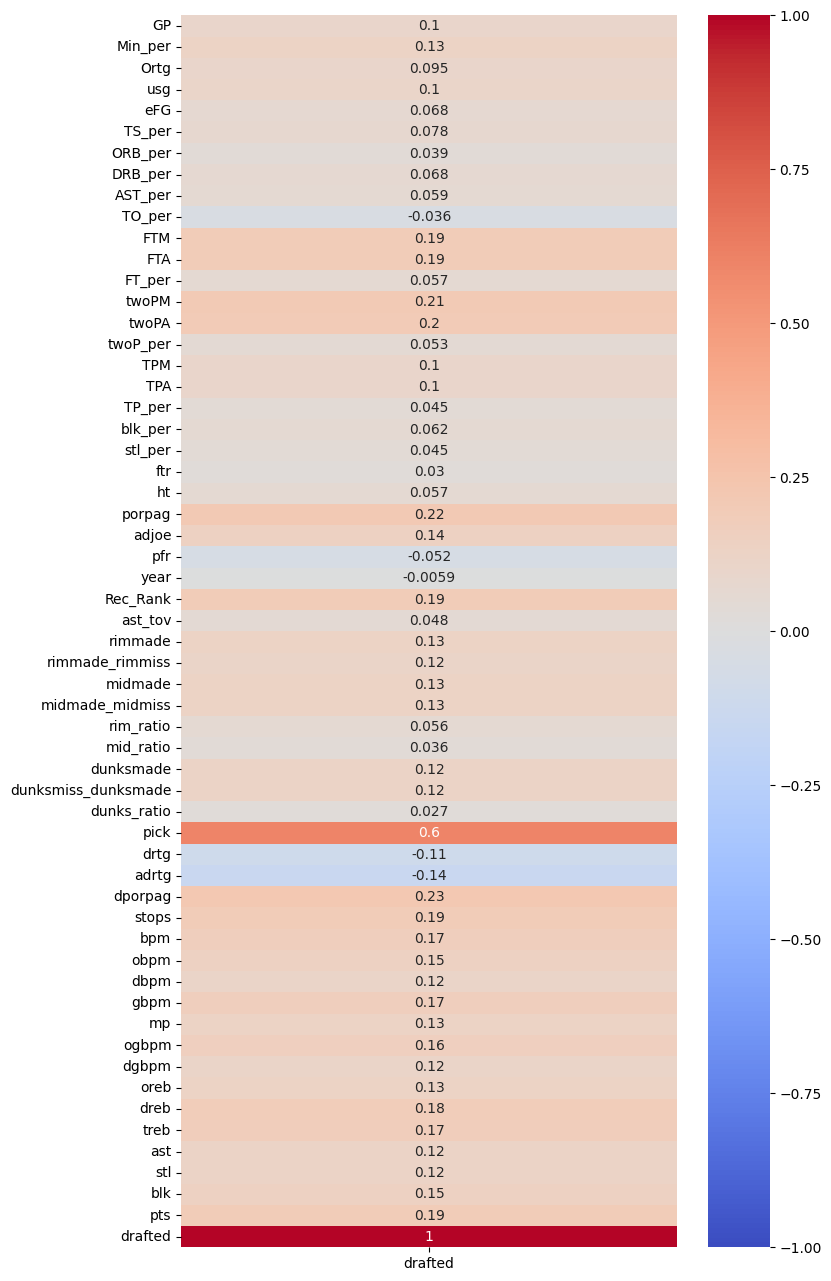

In [116]:
import seaborn as sns

num_cols_with_bool = df_copy.select_dtypes(include=['int64', 'float64', 'bool']).columns.to_list()
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.to_list()

plt.figure(figsize=(8, 16))
sns.heatmap(df_copy[num_cols].corr()[['drafted']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title(f'Correlation with {target_column}')
plt.show()

## Feature Selection

In [117]:
from group_12_krml_adv_mla_2024.features import feature_selection as fs
## feature selection with default threshold 0.1
feat_selector = fs.FeatureSelector()

In [118]:
# selects numerical features with threshold >=1 
selected_features = feat_selector.select_numerical_features(df_copy, df_copy['drafted'])[:-1]

In [119]:
len(selected_features)

36

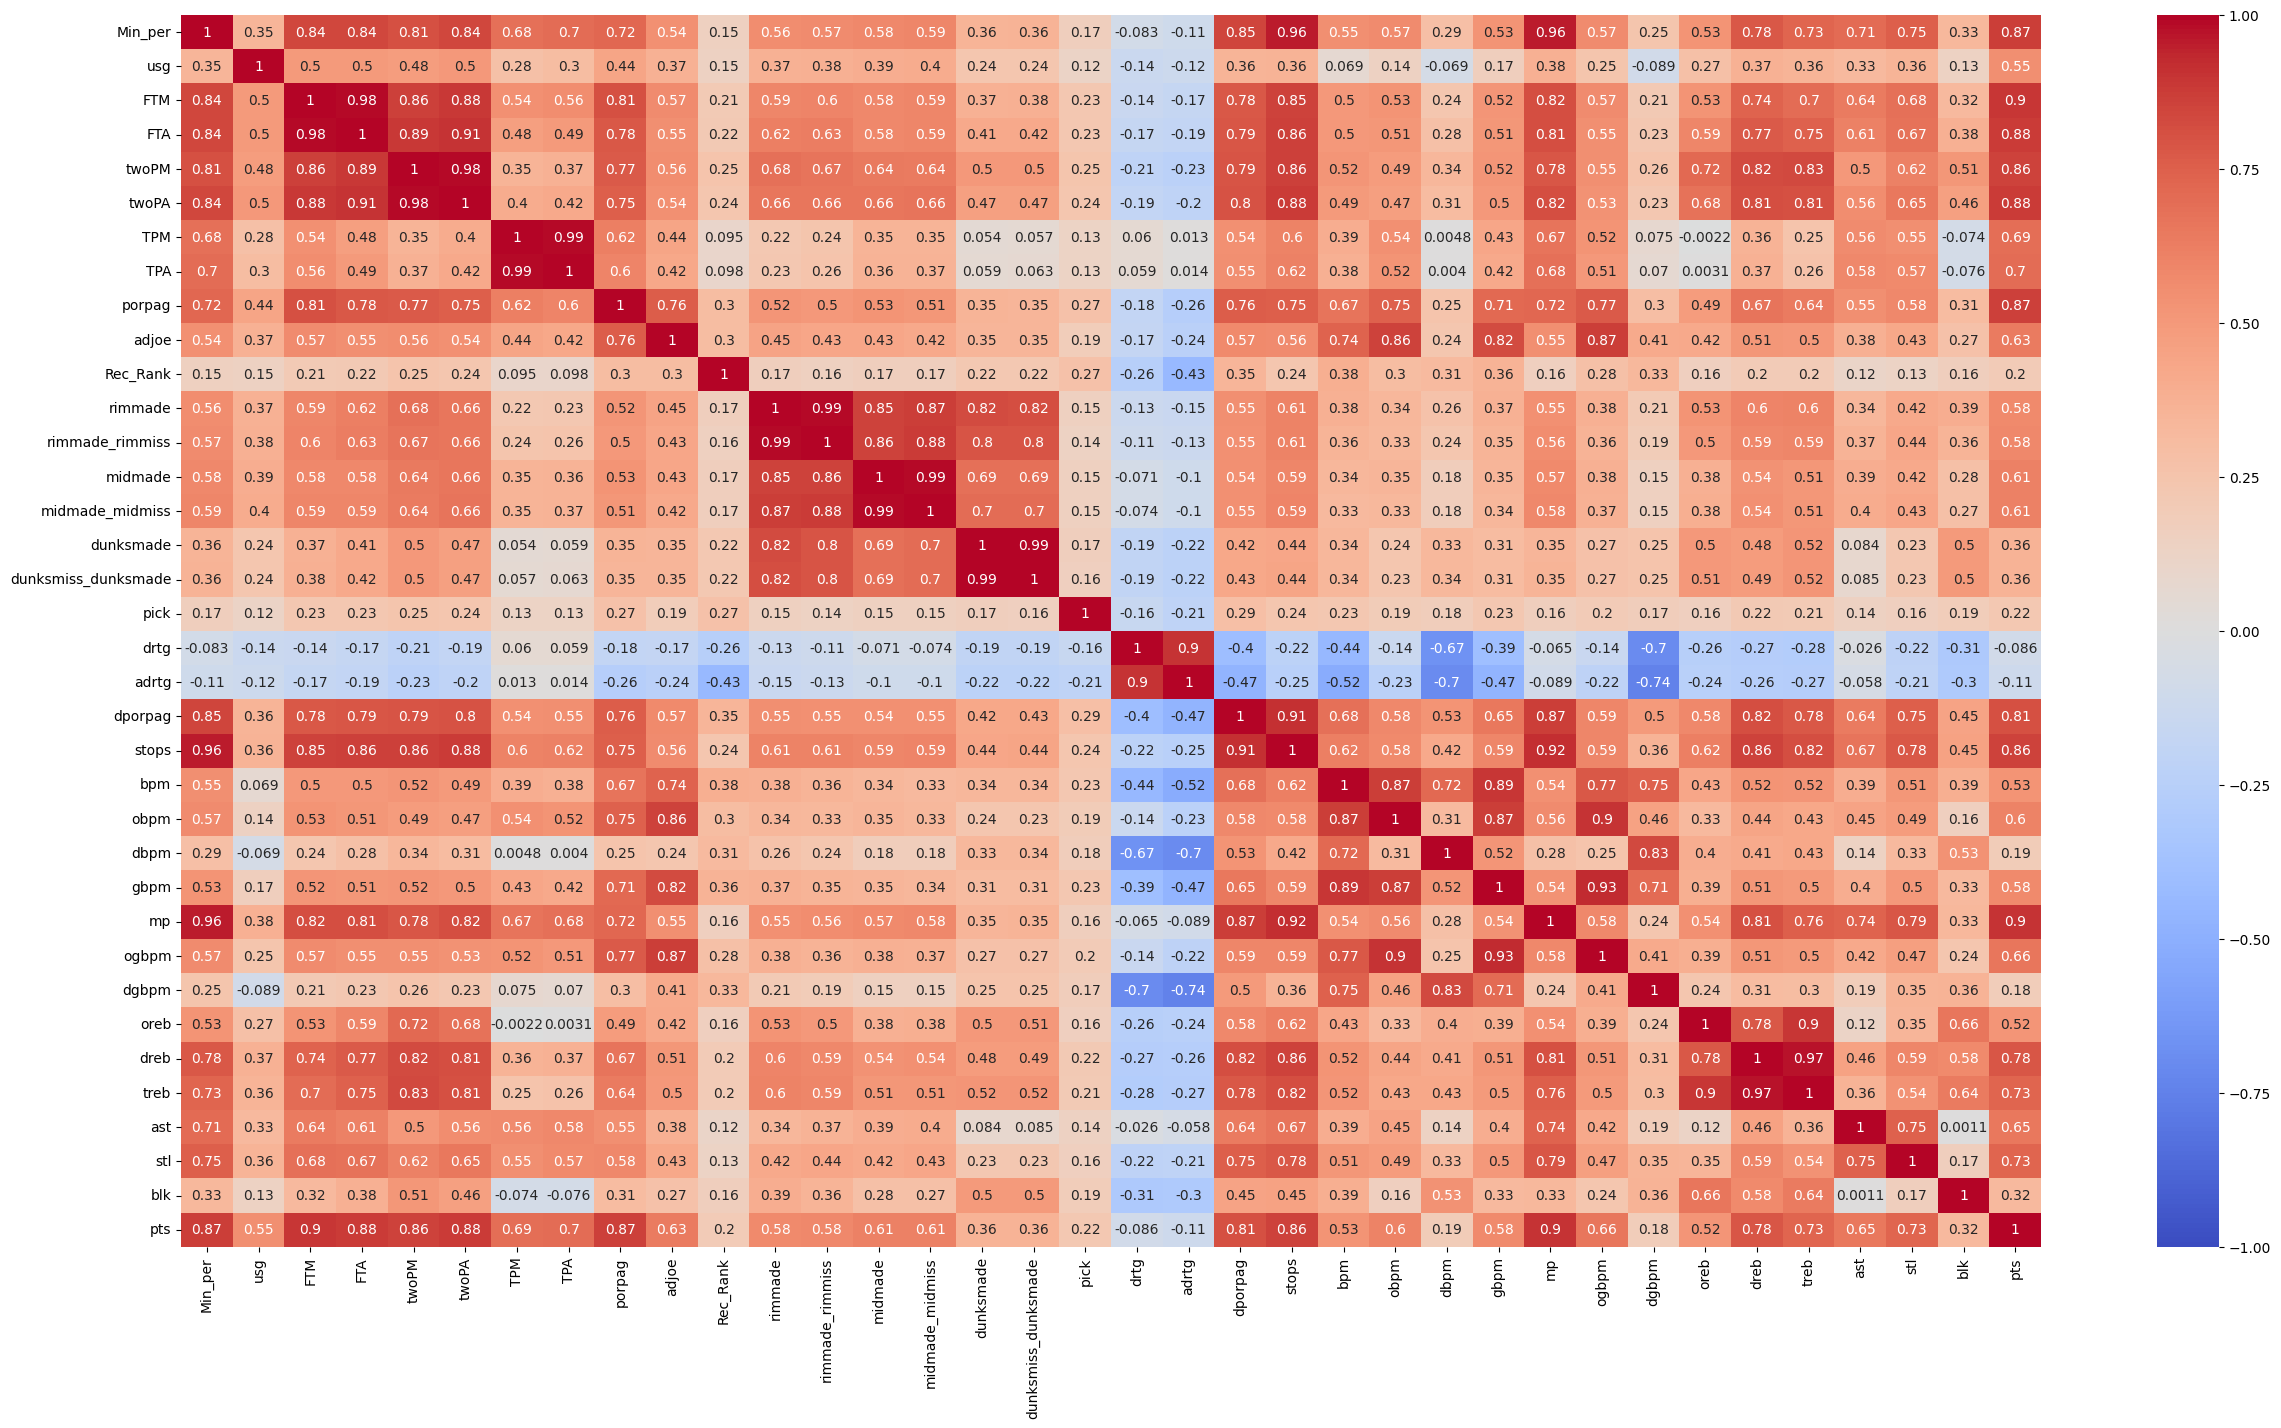

In [120]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_copy[selected_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title(f'Correlation with {target_column}')
plt.show()

In [121]:
corr_matrix = df_copy[selected_features].corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            columns_to_drop.append(columns[j])

columns_to_drop = set(columns_to_drop)
print(len(columns_to_drop))

22


In [122]:
selected_features_2 = []
for i in selected_features:
    if i not in columns_to_drop:
        selected_features_2.append(i)



In [123]:
len(selected_features_2)

14

### Feature Scaling

In [124]:
from group_12_krml_adv_mla_2024.features import feature_transformation as ft
data_scaler = ft.DataScaler()

y = df_copy['drafted']
# Define the feature matrix (X) by dropping the 'drafted' column from df_copy_cleaned
X = df_copy[selected_features_2]
# X_copy = X.drop(columns=['pick'])
# Scaling the value
X_scaled = data_scaler.fit_transform(X)

### Modeling and Evaluation

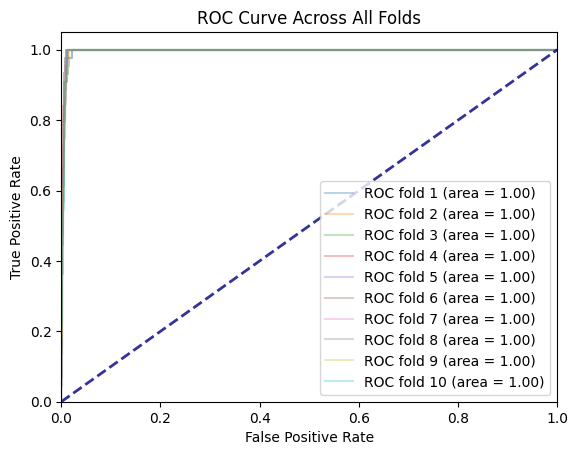

Mean ROC AUC Score from Cross-Validation: 0.9965
Standard Deviation of ROC AUC Scores: 0.0006
Mean Precision Score from Cross-Validation: 0.6262
Standard Deviation of Precision Scores: 0.0692
Mean Recall Score from Cross-Validation: 0.5830
Standard Deviation of Recall Scores: 0.0470

Confusion Matrix for fold 1:
[[4599   19]
 [  21   23]]

Confusion Matrix for fold 2:
[[4606   12]
 [  20   24]]

Confusion Matrix for fold 3:
[[4598   20]
 [  20   24]]

Confusion Matrix for fold 4:
[[4609    9]
 [  17   27]]

Confusion Matrix for fold 5:
[[4601   16]
 [  14   31]]

Confusion Matrix for fold 6:
[[4602   15]
 [  19   26]]

Confusion Matrix for fold 7:
[[4600   17]
 [  18   27]]

Confusion Matrix for fold 8:
[[4606   11]
 [  17   28]]

Confusion Matrix for fold 9:
[[4599   18]
 [  19   25]]

Confusion Matrix for fold 10:
[[4597   20]
 [  20   24]]



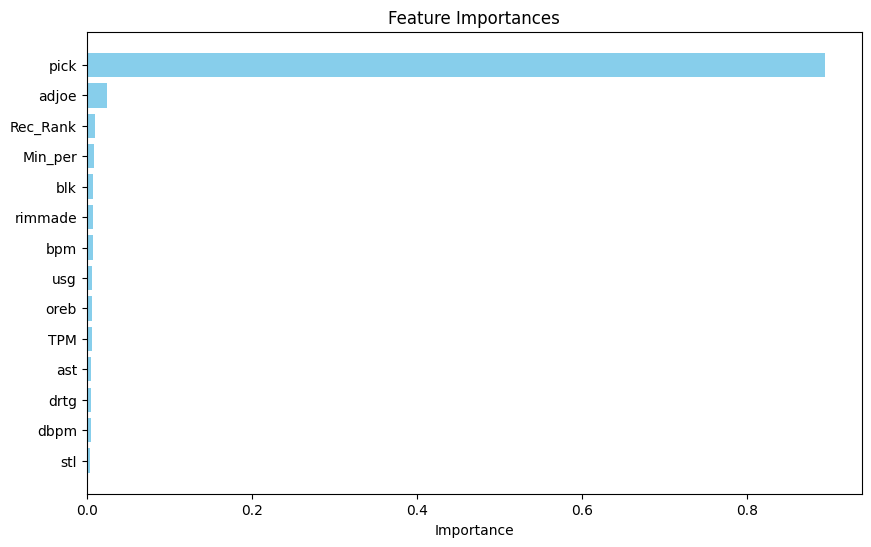

In [125]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay

from group_12_krml_adv_mla_2024.models import evaluation as ev


def plot_confusion_matrix_from_results(results):
    """
    Plot confusion matrices from the results of cross-validation.

    Args:
        results: A dictionary containing confusion matrices for each fold.
    """
    for fold, cm in enumerate(results['confusion_matrices'], 1):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for Fold {fold}')
        plt.show()

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', seed=42)

# Train and evaluate the model
results = ev.train_and_evaluate_model(X_scaled, y, xgb_model, kf)

# Plot ROC curve
ev.plot_roc_curve()

# Print evaluation summary
ev.print_evaluation_summary(results)

# Plot feature importances
ev.plot_feature_importance(xgb_model, X)


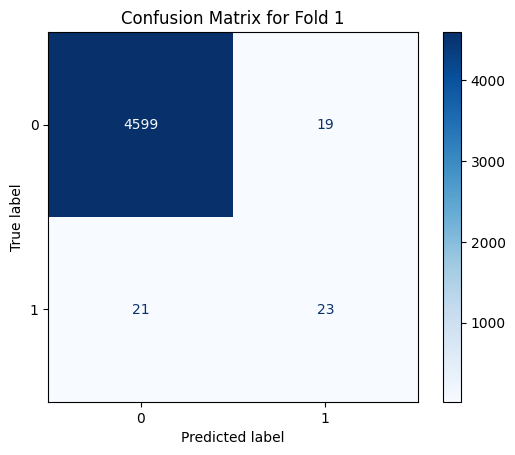

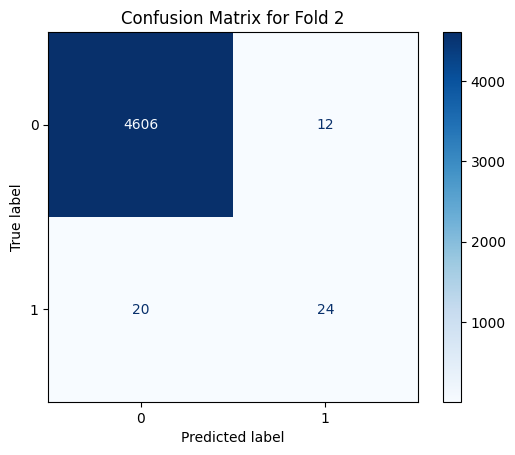

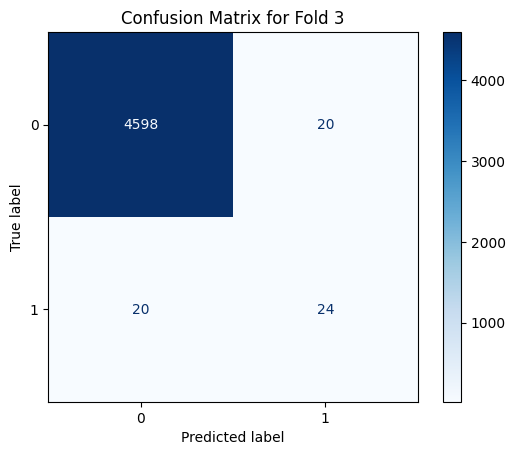

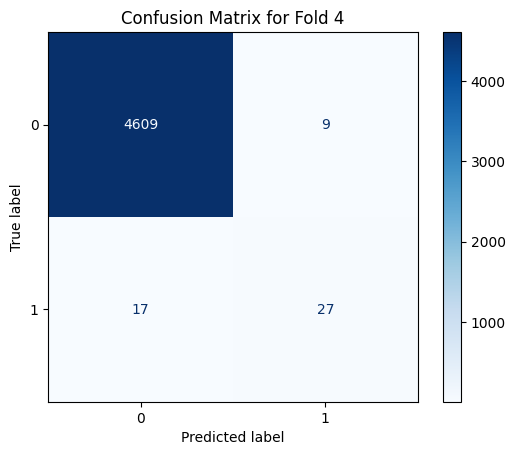

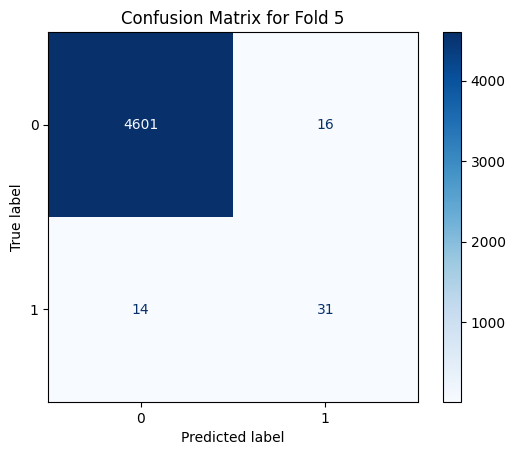

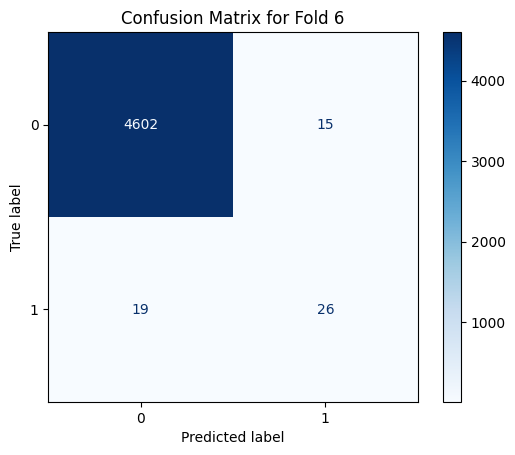

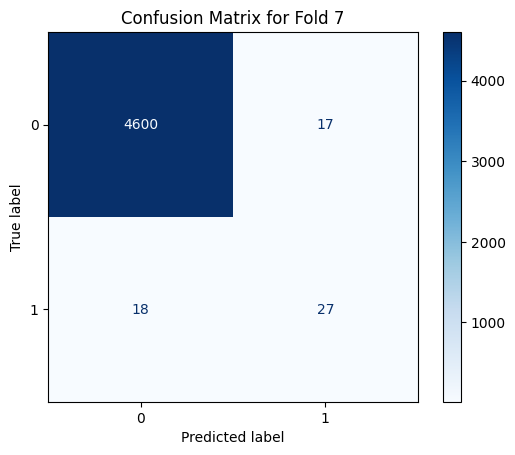

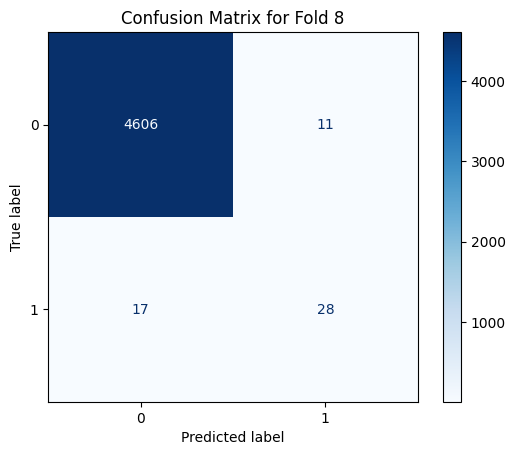

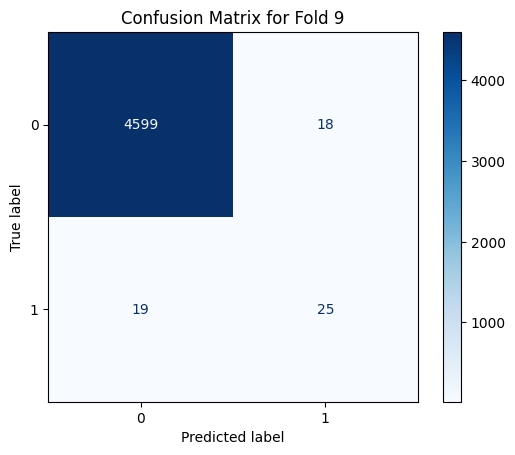

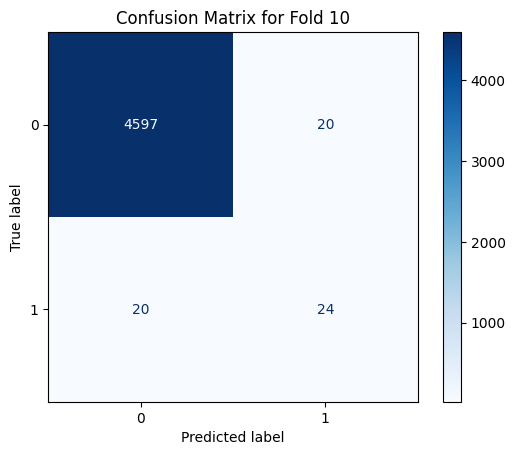

In [126]:
plot_confusion_matrix_from_results(results)

### Testing
Using test data for model testing

In [127]:
test_df = pd.read_csv('../data/raw/test.csv')

In [128]:
# making copy of test df
test_df_copy = test_df.copy()

# keep the player id separate
player_id = test_df_copy['player_id']

In [129]:
# encoding the hight and pick
test_df_copy = fe.convert_height(test_df_copy,'ht')
test_df_copy = fe.convert_pick(test_df_copy, 'pick')


In [130]:
# apply same threshold values to test_df as applied to train data
tfeat_th = threshold.get_feature_threshold()
# print(f'training feat : {tfeat_th}')
for fth in tfeat_th:
    for key, values in fth.items():
        test_df_copy[key].apply(lambda x: max(values['lower_bound'], min(x, values['upper_bound'])))
    # print(fth)


In [131]:
# filling na with medians from training data
test_df_copy = test_df_copy.fillna(train_medians)
test_df_copy = data_encoder.transform(test_df_copy, ['yr'])

print(test_df_copy.shape)

(4970, 62)


In [132]:
# selected only the features used during training
final_test_df = test_df_copy[selected_features_2]
print(final_test_df.shape)

(4970, 14)


In [133]:
# scale the feature as done in training
final_test_df_scaled = data_scaler.transform(final_test_df)
print(final_test_df.shape)


(4970, 14)


In [134]:
# test with the model
# predict on the test dat
y_test_pred_prob = xgb_model.predict_proba(final_test_df_scaled)[:, 1]
# store the result on the data frame
results_df = pd.DataFrame({'player_id':test_df['player_id'], 'drafted':y_test_pred_prob})
# results_df.to_csv('../data/results/shrestha_dipesh_24996124_week3_XGboost_featureEngineered-selected_few_feat_final.csv', index=False)
results_df.head(5)

,player_id,drafted
0,23549e01-c1b3-4ca0-a0fd-de9b5d76276b,2.120597e-07
1,52a518bb-b34a-4b43-adee-5e996cb853fa,2.854848e-07
2,ad3d9117-b6bf-4675-ab97-3497acf3e555,1.496967e-06
3,eaf66a5c-6f4c-4070-bc70-a99d731b3740,1.347386e-07
4,55d07491-5bd1-447f-844e-9cb36eaa442e,7.512147e-06


### Hyperparameter Tuning 

In [135]:
from group_12_krml_adv_mla_2024.models import tune_hyperparameters as thyp

# Define the parameter grid
param_grid = {
        'n_estimators': [50, 60, 61],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.11],
        'subsample': [0.7,0.8]
    }
    
    # Initialize XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', seed=42)
best_model = thyp.tune_hyperparameters(model, param_grid, X_scaled, y)



Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60, 'subsample': 0.8}
Best ROC AUC Score: 0.9971


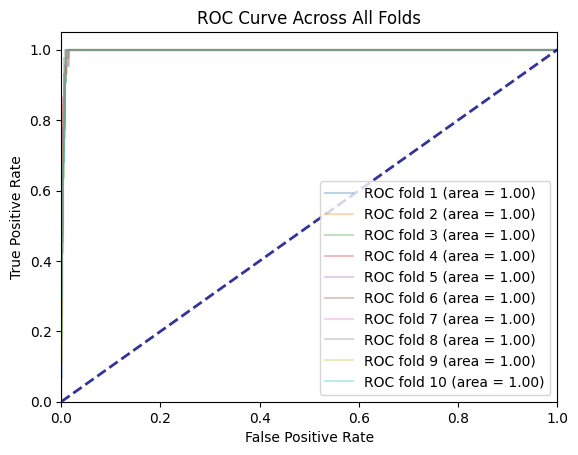

Mean ROC AUC Score from Cross-Validation: 0.9971
Standard Deviation of ROC AUC Scores: 0.0007
Mean Precision Score from Cross-Validation: 0.6856
Standard Deviation of Precision Scores: 0.0711
Mean Recall Score from Cross-Validation: 0.5921
Standard Deviation of Recall Scores: 0.0559

Confusion Matrix for fold 1:
[[4602   16]
 [  17   27]]

Confusion Matrix for fold 2:
[[4613    5]
 [  19   25]]

Confusion Matrix for fold 3:
[[4605   13]
 [  21   23]]

Confusion Matrix for fold 4:
[[4606   12]
 [  16   28]]

Confusion Matrix for fold 5:
[[4603   14]
 [  15   30]]

Confusion Matrix for fold 6:
[[4602   15]
 [  22   23]]

Confusion Matrix for fold 7:
[[4607   10]
 [  15   30]]

Confusion Matrix for fold 8:
[[4608    9]
 [  17   28]]

Confusion Matrix for fold 9:
[[4600   17]
 [  18   26]]

Confusion Matrix for fold 10:
[[4605   12]
 [  21   23]]



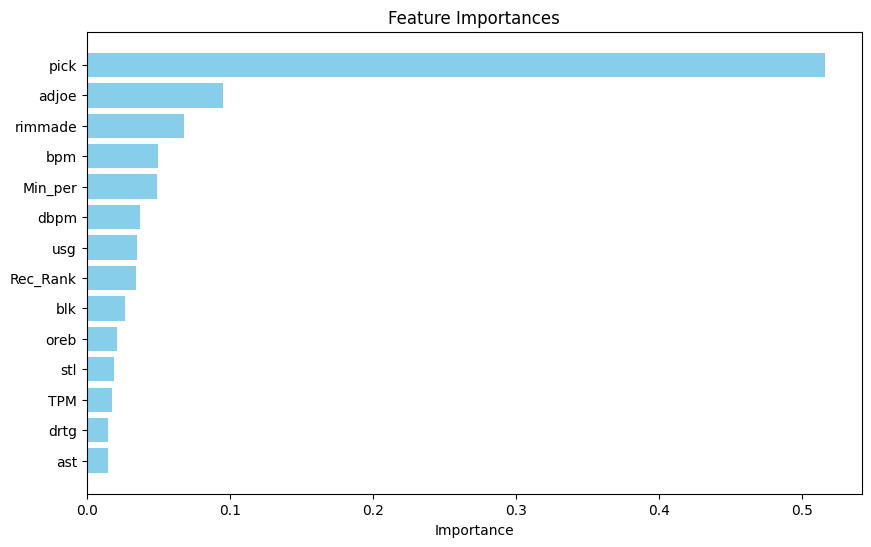

In [136]:
# Initialize the XGBoost model
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', seed=42)

# Train and evaluate the model
results = ev.train_and_evaluate_model(X_scaled, y, best_model, kf)

# Plot ROC curve
ev.plot_roc_curve()

# Print evaluation summary
ev.print_evaluation_summary(results)

# Plot feature importances
ev.plot_feature_importance(best_model, X)

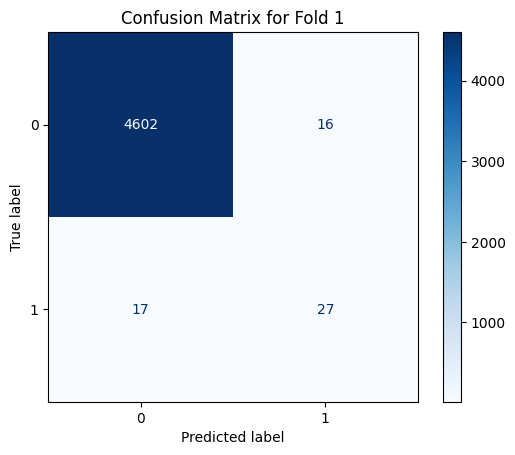

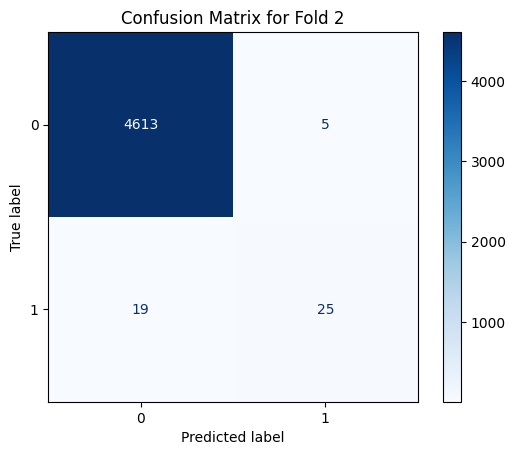

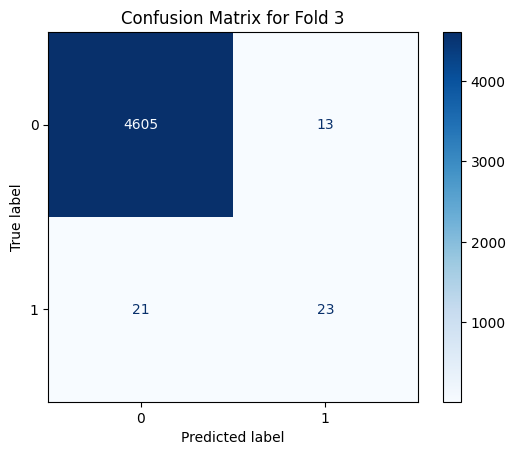

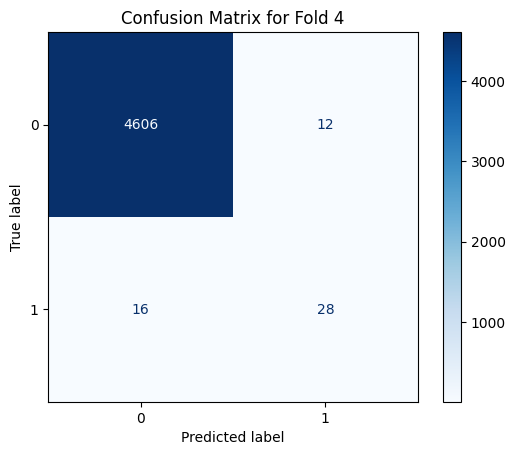

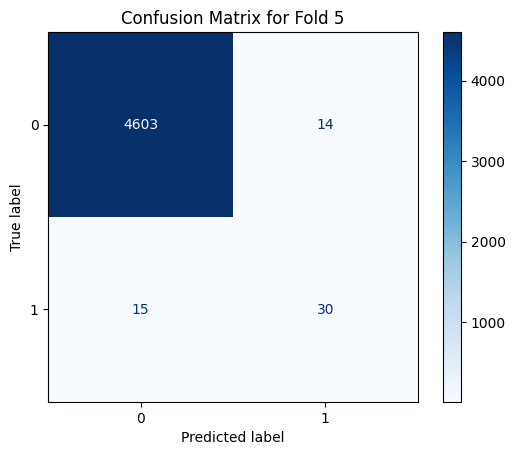

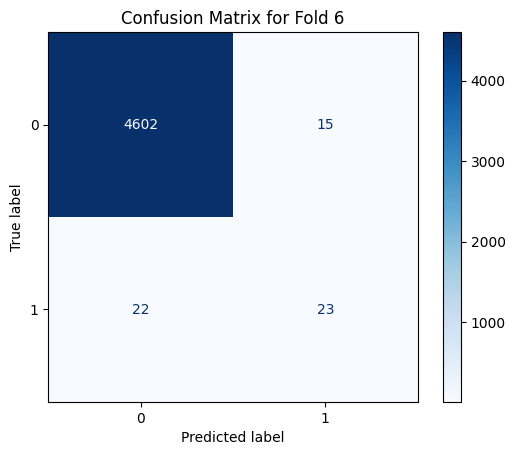

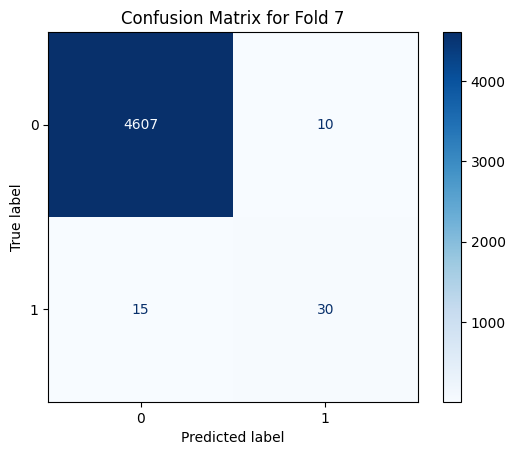

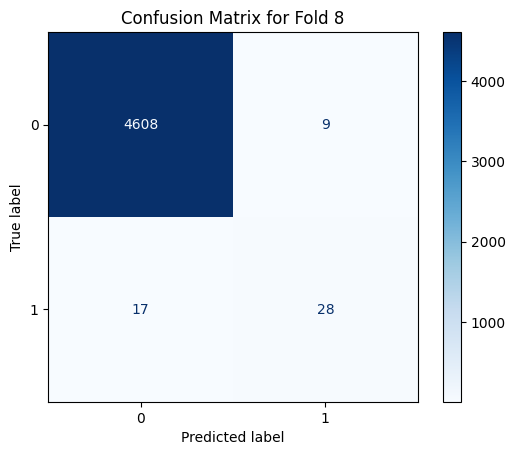

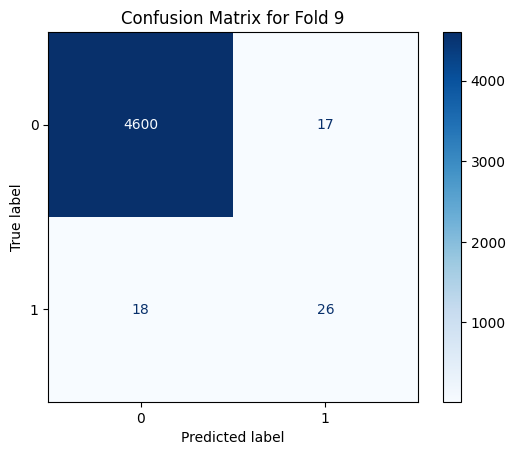

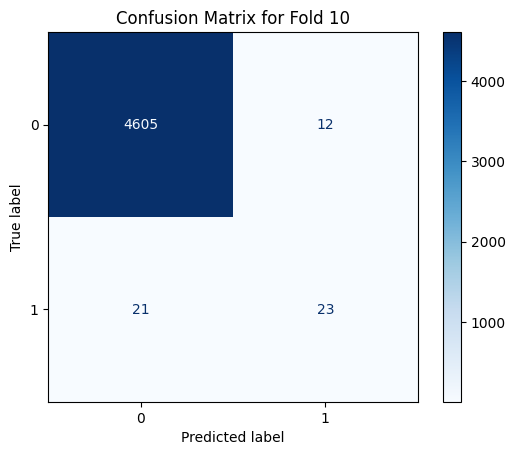

In [137]:
plot_confusion_matrix_from_results(results)

## Testing

In [139]:
# predicting on the kaggle test data
y_test_pred_prob = best_model.predict_proba(final_test_df_scaled)[:, 1]
# storing the result on the result dataframe
results_df = pd.DataFrame({'player_id':test_df['player_id'], 'drafted':y_test_pred_prob})
# results_df.to_csv('../data/results/shrestha_dipesh_24996124_week3_XGboost_featureEngineered-hptuned_with_few_features.csv', index=False)
# results_df.head()